# Community Detection

In this demo, we will hand on a simple community detection example using `networkx`. The demo goes as:

- Introduction
- Dataset
- Edge Betweenness
- Community Detection
- Conclusion

## Introduction

`networkx` is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. It provides:
- tools for the study of the structure and dynamics of social, biological, and infrastructure networks;
- a standard programming interface and graph implementation that is suitable for many applications;
- a rapid development environment for collaborative, multidisciplinary projects;
- an interface to existing numerical algorithms and code written in C, C++, and FORTRAN; and
- the ability to painlessly work with large nonstandard data sets.

With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

In this demo, we use Karate Club dataset. It's is a graph dataset that describe relationships of people in s karate club

In [58]:
G = nx.karate_club_graph()
print(G.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [98]:
print('Number of edges:', len(G.edges))

Number of edges: 78


`networkx` support drawing graph using `matplotlib` as backend. Nevertheless, it also support drawing graph in many different styles.

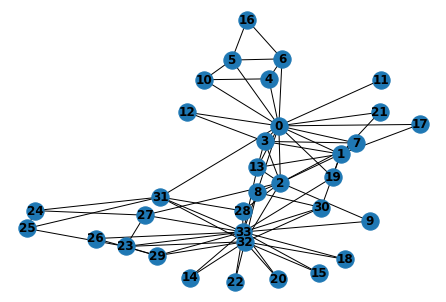

In [61]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', edge_color='k')
plt.show()

## Edge Betweeness

Edge betweeness is term used to tell how central is an edge in a graph. Edge betweenness cal tell us which edges are the most central to communities, the Girvan–Newman algorithm focuses on edges that are most likely "between" communities.  

The Girvan–Newman algorithm defining the "edge betweenness" of an edge as the number of shortest paths between pairs of nodes that run along it. If there is more than one shortest path between a pair of nodes, each path is assigned equal weight such that the total weight of all of the paths is equal to unity. If a network contains communities or groups that are only loosely connected by a few inter-group edges, then all shortest paths between different communities must go along one of these few edges. Thus, the edges connecting communities will have high edge betweenness (at least one of them). By removing these edges, the groups are separated from one another and so the underlying community structure of the network is revealed.

In [83]:
centrality = nx.edge_betweenness_centrality(G)

In [84]:
centrality

{(0, 1): 0.025252525252525245,
 (0, 2): 0.0777876807288572,
 (0, 3): 0.02049910873440285,
 (0, 4): 0.0522875816993464,
 (0, 5): 0.07813428401663694,
 (0, 6): 0.07813428401663695,
 (0, 7): 0.0228206434088787,
 (0, 8): 0.07423959482783014,
 (0, 10): 0.0522875816993464,
 (0, 11): 0.058823529411764705,
 (0, 12): 0.04652406417112298,
 (0, 13): 0.04237189825425121,
 (0, 17): 0.04012392835922248,
 (0, 19): 0.045936960642843,
 (0, 21): 0.040123928359222474,
 (0, 31): 0.1272599949070537,
 (1, 2): 0.023232323232323233,
 (1, 3): 0.0077243018419489,
 (1, 7): 0.007422969187675069,
 (1, 13): 0.01240556828792123,
 (1, 17): 0.01869960105254222,
 (1, 19): 0.014633732280791102,
 (1, 21): 0.01869960105254222,
 (1, 30): 0.032280791104320514,
 (2, 3): 0.022430184194890075,
 (2, 7): 0.025214328155504617,
 (2, 8): 0.009175791528732704,
 (2, 9): 0.030803836686189627,
 (2, 13): 0.007630931160342923,
 (2, 27): 0.04119203236850296,
 (2, 28): 0.02278244631185807,
 (2, 32): 0.06898678663384543,
 (3, 7): 0.00336558

Get the edge with highest betweenness

In [85]:
m = max(centrality, key=centrality.get)
print(m)

(0, 31)


Let's draw the graph again so we can highlight the most central edge in context.

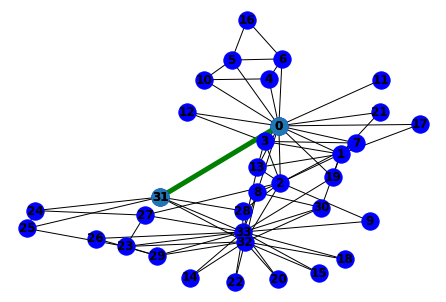

In [96]:
nx.draw(G, pos, with_labels=True, font_weight='bold', edge_color='k',
        node_color='b')
nx.draw(G.subgraph(m), pos, with_labels=True, font_weight='bold', 
        edge_color='g', width=5)
plt.show()

## Community Detection

Next, based on the concept of edge betweenness, the Girvan-Newman algorithm detect and remove the most central edge to divide the original graph in communities.
`networkx` also support the Girvan-Newman algorithm as below;

In [75]:
from networkx.algorithms.community.centrality import girvan_newman
com = girvan_newman(G)

The fucntion return a generator which generate result communities after every loop.

In [63]:
type(com)

generator

Take the first loop's result, then we have 2 communities.

In [76]:
com1, com2 = tuple(sorted(c) for c in next(com))

    Visualize the graph again with highlighted communities.

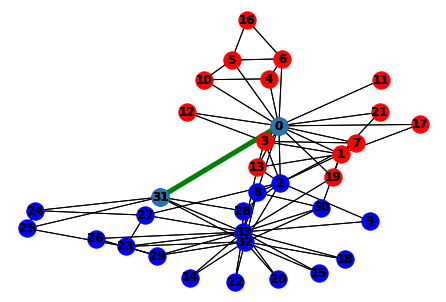

In [93]:
nx.draw(G, pos, with_labels=True, font_weight='bold', edge_color='k',
        nodelist=com1, node_color='r')
nx.draw(G, pos, with_labels=True, font_weight='bold', edge_color='k',
        nodelist=com2, node_color='b')
nx.draw(G.subgraph([0,31]), pos, with_labels=True, font_weight='bold', 
        edge_color='g', width=5)
plt.show()